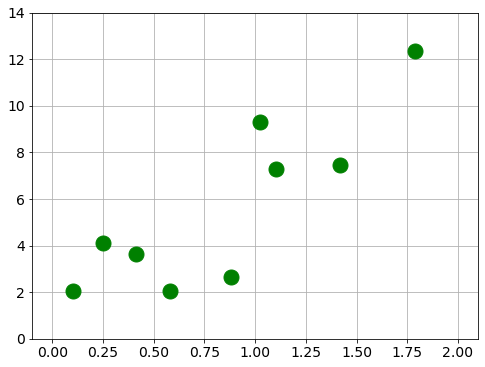

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']='14'

np.random.seed(3)
x=2*np.random.rand(10) 
y=3+4*x+np.random.randn(10)*2.5

plt.figure(figsize=(8,6))
plt.plot(x,y,'go',markersize=15)
plt.grid()
plt.xlim([-0.1,2.1])
plt.ylim([0,14])
plt.savefig('randomdots_linearreg.png',dpi=350)
#plt.close()

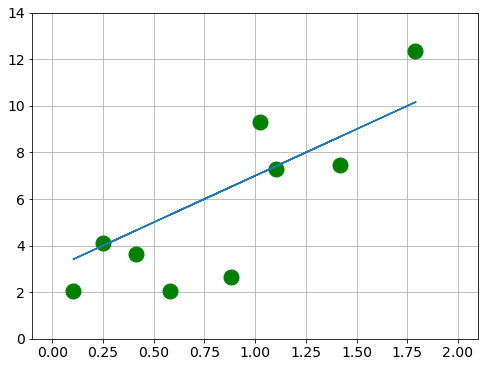

In [2]:
np.random.seed(3)
x=2*np.random.rand(10) 
y=3+4*x+np.random.randn(10)*2.5

y_true=3+4*x

plt.figure(figsize=(8,6))
plt.plot(x,y,'go',markersize=15)
plt.plot(x,y_true)
plt.grid()
plt.xlim([-0.1,2.1])
plt.ylim([0,14])
plt.savefig('randomdots_true_linearreg.png',dpi=350)

In [3]:
for a,b in zip(x,y):
    
    print('(',np.around(a,2),',',np.around(b,2),')')


( 1.1 , 7.3 )
( 1.42 , 7.47 )
( 0.58 , 2.04 )
( 1.02 , 9.3 )
( 1.79 , 12.35 )
( 1.79 , 14.44 )
( 0.25 , 4.13 )
( 0.41 , 3.65 )
( 0.1 , 2.05 )
( 0.88 , 2.66 )


In [4]:
for (a,b) in sorted(zip(x, y)):
     print('(',np.around(a,3),',',np.around(b,3),')')

( 0.103 , 2.048 )
( 0.251 , 4.13 )
( 0.414 , 3.646 )
( 0.582 , 2.043 )
( 0.882 , 2.66 )
( 1.022 , 9.298 )
( 1.102 , 7.297 )
( 1.416 , 7.472 )
( 1.786 , 12.347 )
( 1.793 , 14.444 )


In [5]:
#genearte samples
np.random.seed(3)
x=2*np.random.rand(10) 
y=3+4*x+np.random.randn(10)*2.5

#reorganize
X=np.ones((2,10))
X[1,:]=x

#initialize
theta=np.random.randn(2,1)
theta_all=[]
grad_all=[]

lr=0.01

for i in range(200):
    
    theta_all.append(theta)
    h=np.dot(theta.T,X)
    grad=np.dot(X,(h-y.reshape(1,10)).T)
    grad_all.append(grad)
    theta=theta-lr*grad
    
    

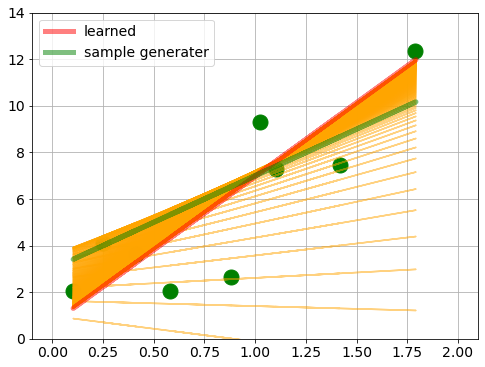

In [6]:
np.random.seed(3)
x=2*np.random.rand(10) 
y=3+4*x+np.random.randn(10)*2.5

plt.figure(figsize=(8,6))
plt.plot(x,y,'go',markersize=15)
for i in range(200):
    plt.plot(x,theta_all[i][1]*x+theta_all[i][0],'orange',alpha=0.5)
    
plt.plot(x,theta[1]*x+theta[0],'r',linewidth=5,alpha=0.5,label='learned')
plt.plot(x,y_true,'g',linewidth=5,alpha=0.5,label='sample generater')
plt.legend()
plt.grid()
plt.xlim([-0.1,2.1])
plt.ylim([0,14])
plt.savefig('gd_linearreg.png',dpi=350)

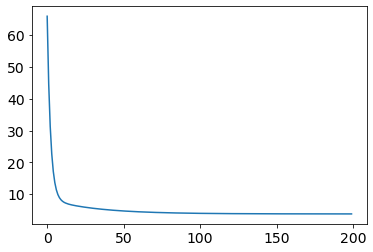

In [7]:
#print(X,y)
theta_0=np.array([[0.98236743],[-1.10106763]])

def mse(theta,X,y):
    return (1.0/len(x))*np.sum(np.square(np.dot(theta.T,X)-y.reshape(1,10)))

loss=[]
for tt in theta_all:
    loss.append(mse(tt,X,y))
    
plt.plot(loss)

In [8]:
theta_all[0],grad_all[0]

theta_all[0]-lr*grad_all[0],theta_all[1]

(array([[ 1.64093618],
        [-0.23692724]]),
 array([[ 1.64093618],
        [-0.23692724]]))

In [9]:
theta0=np.linspace(-theta_0[0]*10, theta_0[0]*10, 100)
theta1=np.linspace(-theta_0[1]*10, theta_0[1]*10, 100)

mse_grid=np.zeros((theta0.size,theta1.size))

new_theta=np.zeros((2,1))
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        new_theta[0][0]=t0
        new_theta[1][0]=t1
        mse_grid[i,j]=mse(new_theta,X,y)


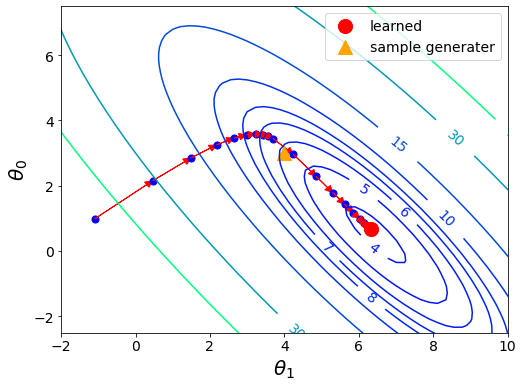

In [14]:
levels = [0.0,1,2,3,4,5,6,7,8,10,15,30,50]
plt.figure(figsize=(8,6))
#plt.contourf(np.squeeze(theta1,1), np.squeeze(theta0,1), mse_grid,levels,cmap='autumn')

CS=plt.contour(np.squeeze(theta1,1),np.squeeze(theta0,1),mse_grid,levels,cmap='winter')
plt.clabel(CS, inline=True)

dots=theta_all[:20][::2]+theta_all[30:][::20]
dots.append(theta_all[-1])

for i,cur in enumerate(dots):
    if i+1<len(dots):
        nxt=dots[i+1]
        plt.scatter(*cur[1],*cur[0],color='b',s=50)
        plt.arrow(*cur[1],*cur[0],nxt[1][0]-cur[1][0],nxt[0][0]-cur[0][0],
                  head_length=.2, head_width=0.2,color='r',length_includes_head=True)
    
    
plt.scatter(theta_all[-1][1],theta_all[-1][0],color='r',s=200,label='learned')
plt.scatter(4,3,marker='^',color='orange',s=200,label='sample generater')
plt.legend()
plt.xlim([-2,10])
plt.ylim([-2.5,7.5])
plt.ylabel(r'$\theta_0$',fontsize=20)
plt.xlabel(r'$\theta_1$',fontsize=20)

plt.savefig('contour_linearreg.png',dpi=350)

### memo

In [11]:
grid_x=[0,1,2]
grid_y=[0,1]

grid=np.zeros((3,2))
incre=1
for i in enumerate(grid_x):
    for j in enumerate(grid_y):
        
        grid[i,j]=incre
        incre+=1

<AxesSubplot:>

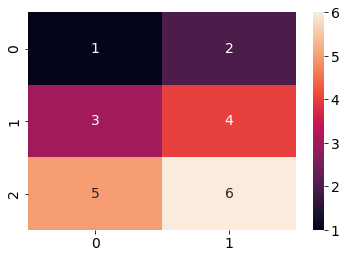

In [12]:
import seaborn as sns
sns.heatmap(grid,annot=True)

In [13]:
a_list=[1,2,3,4,5]

for i, ele in enumerate(a_list):
    if (i+1<len(a_list) and i-1>=0):

        pre=a_list[i-1]
        cur=ele
        nxt=a_list[i+1]

        print(pre, cur, nxt)

1 2 3
2 3 4
3 4 5


https://matplotlib.org/3.5.0/gallery/text_labels_and_annotations/tex_demo.html

http://taustation.com/matplotlib-pyplot-contour-contourf/